https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
netflix= pd.read_csv('netflix_titles.csv')
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [21]:
netflix.info() #podemos observar que tenemos varias columnas que tienen valores NaN, o nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
netflix.dtypes #otra forma de saber los tipos de datos por columnas

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [23]:
netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [24]:
netflix['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [25]:
#voy a cambiar el tipo de dato de la columna 'type' de 'object' a 'category'
#y cambiare el tipo de dato de la columna 'date_added' de 'object' a 'datetime64'

In [26]:
netflix['type']=netflix['type'].astype('category')

In [27]:
netflix['date_added']=netflix['date_added'].astype('datetime64[ns]')

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
#investigando en internet este error puede deberse a que hay espacios en blanco alrededor de las cadenas
#que serian las fechas asi que hare lo siguiente:
netflix['date_added']= netflix['date_added'].str.strip()

In [ ]:
#ahora volvere a intentar cambiar el dato de la columna de 'object' a 'datetime64'
netflix['date_added']= pd.to_datetime(netflix['date_added'], format='%B %d, %Y')

In [ ]:
netflix.dtypes # y por fin ya se pudieron cambiar los tipos de datos de las respectivas columnas

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
netflix.info() #ahora procedere a reemplazar los valores nulos por algo mas adecuado como 'unknown' en lugar
               #de borrar todas las filas que tengan valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(9)
memory usage: 765.7+ KB


In [ ]:
#ahora procedere a rellenar los valores nulos solo de las columnas que tienen valores nulos
#(ya que si incluyo todo el dataframe, al tener una columna categorica que ma a marcar error)

In [ ]:
columnas_NaN= ['director', 'cast', 'country', 'date_added', 'rating', 'duration']
netflix[columnas_NaN].fillna('unknown', inplace=True)

C:\Users\JESUS MIKE\AppData\Local\Temp\ipykernel_13724\4103886259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix[columnas_NaN].fillna('unknown', inplace=True)


In [ ]:
netflix.info()#se logro en su gran mayoria sustituir los valores nulos pero aun quedaron unos pocos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(9)
memory usage: 765.7+ KB


In [ ]:
#por ultimo procedere a eliminar la columna 'show_id' ya que no la considero muy necesaria
netflix.drop('show_id', axis=1, inplace=True)

In [ ]:
netflix.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#por ultimo hare algunas graficas para visualizar algunos datos

In [ ]:
#primero visualizar la columna 'type'
netflix['type'].value_counts()  #podemos ver que hay mas peliculas que series en netflix 

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

C:\Users\JESUS MIKE\AppData\Local\Temp\ipykernel_9772\302887271.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types.values, y=types.index, palette="dark")


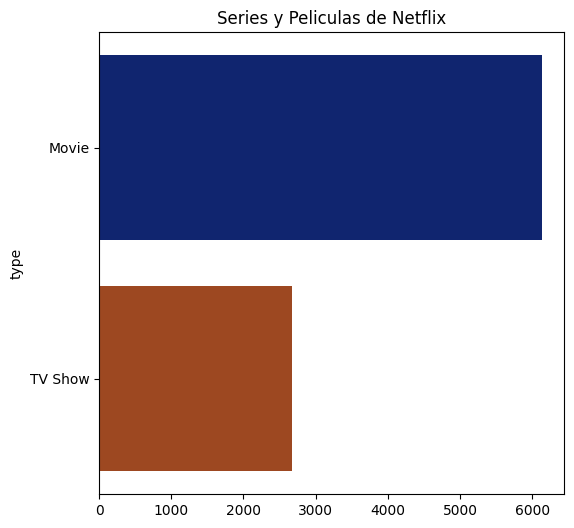

In [ ]:
#ahora vamos a visualizarlo usando seaborn
types= netflix['type'].value_counts() 

plt.figure(figsize=(6, 6))
plt.title("Series y Peliculas de Netflix")
sns.set_color_codes("deep")
sns.barplot(x=types.values, y=types.index, palette="dark")
plt.show()

In [ ]:
netflix['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

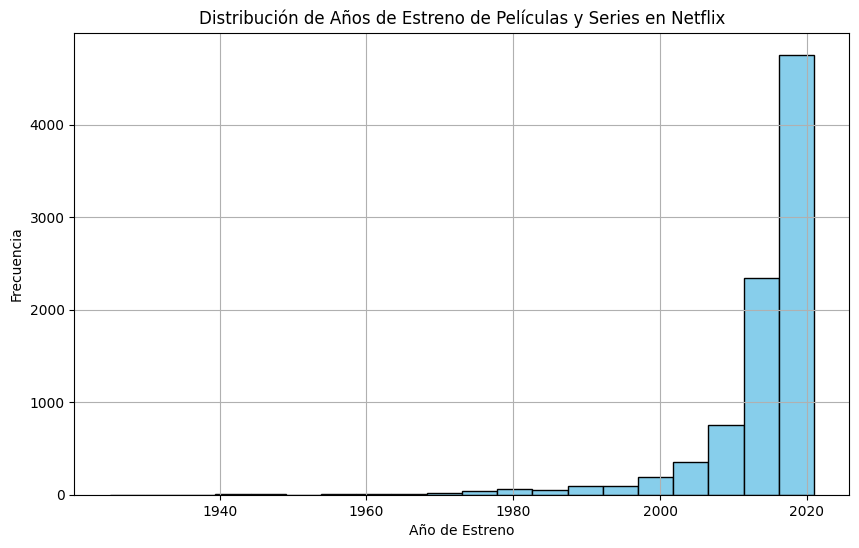

In [ ]:
#ahora graficaremos cuantas peliculas y series an salido por años con un 'Histograma
plt.figure(figsize=(10, 6))
plt.hist(netflix['release_year'], bins=20, color='skyblue', edgecolor='black')  # Puedes ajustar el número de bins según tus datos
plt.title('Distribución de Años de Estreno de Películas y Series en Netflix')
plt.xlabel('Año de Estreno')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
#como podemos observar conforme pasa el tiempo cada vez se estrenan mas series y peliculas a medida que pasan los años

In [ ]:
#ahora por ultimo graficaremos con la columna de los paises para darnos una idea la cantidad de peliculas estrenadas por cada pais
netflix['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

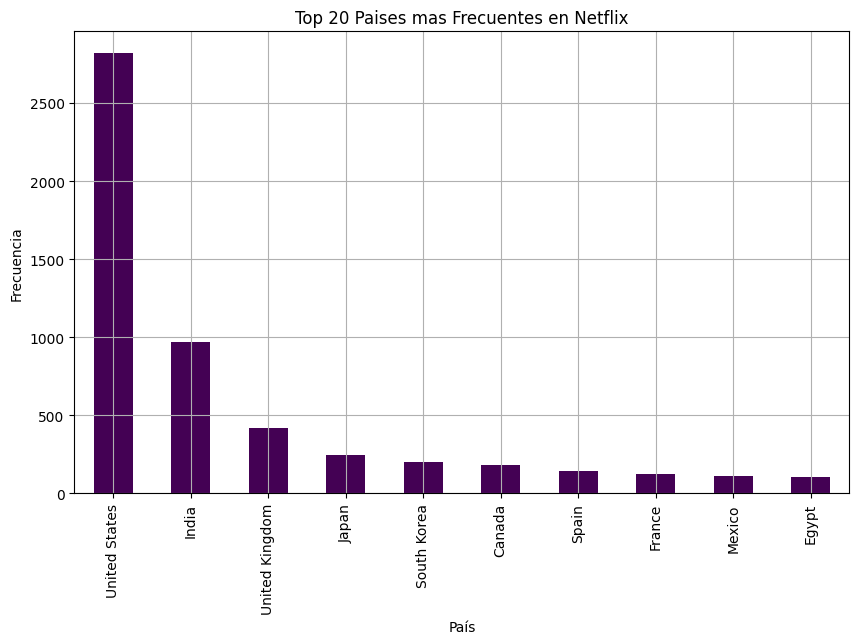

In [ ]:
#como vemos que son muchos y la grafica seria muy grande lo tomaremos los primeros 20 paises 
paises=netflix['country'].value_counts()
top_paises = paises.head(10)

# Graficar un gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
top_paises.plot(kind='bar', cmap='viridis')
plt.title('Top 20 Paises mas Frecuentes en Netflix')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
#como podemos observar la mayoria de las peliculas y series que tiene netflix son de  'ESTADOS UNIDOS', seguido de la 'INDIA', y 'REINO UNIDO'

In [ ]:
#ya para finalizar supongamos que despues de hacerle el data cleaning se requiere que lo pasen a un archivo
#excel o csv, entonces hacemos lo siguiente

In [28]:
# Exportar df a excel
#netflix.to_excel('netflix_clean.xlsx', index=False)#el index=False es para que no salgan indices 

In [29]:
# Expotar df a csv sin indices
#netflix.to_csv('netflix_clean.csv', index=False)